In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

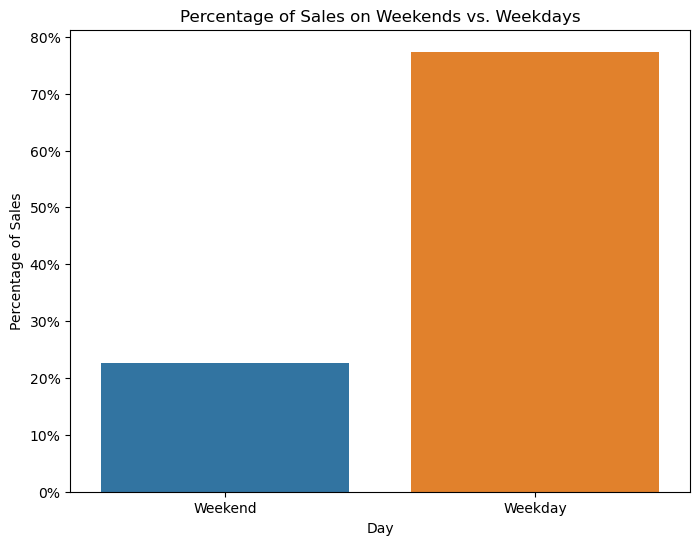

In [2]:
# Load your data
df = pd.read_csv("cleaned_data.csv") 

# Calculate total sales
total_sales = df['revenue'].sum()

# Calculate sales on weekends and weekdays
weekend_sales = df[df['weekend'] == 1]['revenue'].sum()
weekday_sales = df[df['weekend'] == 0]['revenue'].sum()

# Calculate percentages
weekend_sales_percentage = (weekend_sales / total_sales) * 100
weekday_sales_percentage = (weekday_sales / total_sales) * 100

# Create a DataFrame for plotting
sales_data = pd.DataFrame({'Day': ['Weekend', 'Weekday'], 
                          'Percentage': [weekend_sales_percentage, weekday_sales_percentage]})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Day', y='Percentage', data=sales_data)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Set plot title and labels
plt.title("Percentage of Sales on Weekends vs. Weekdays")
plt.xlabel("Day")
plt.ylabel("Percentage of Sales")

# Show the plot
plt.show()

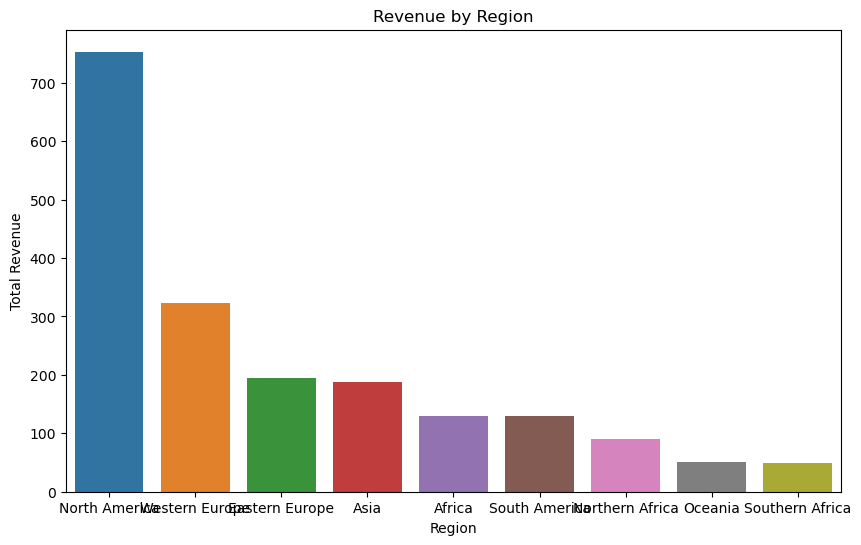

In [3]:
# 2. Which regions are generating the most revenue currently?
region_sales = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

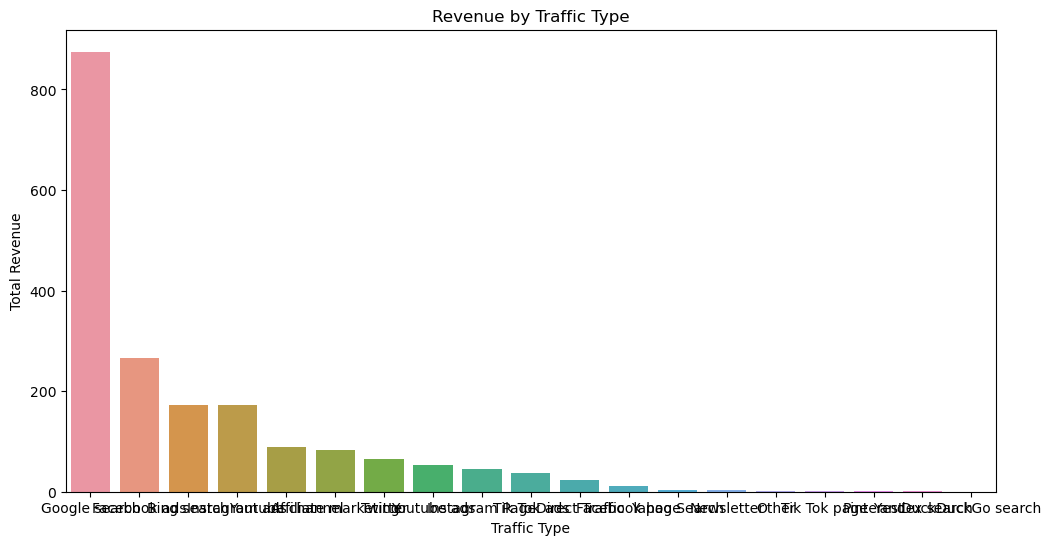

In [4]:
# 3. Is there any particular website traffic that stands out when generating sales?

traffic_sales = df.groupby('traffic_type')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=traffic_sales.index, y=traffic_sales.values)
plt.title("Revenue by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Total Revenue")
plt.show()

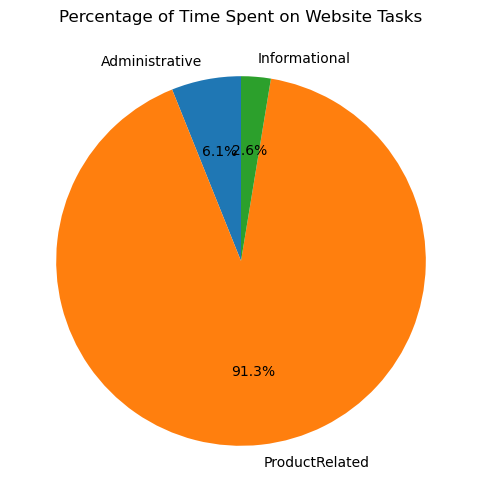

In [5]:
# 4. What percentage of time is spent on the website performing administrative/product or informational related tasks?
total_time = (df['administrative_duration'].sum() +
              df['product_related_duration'].sum() +
              df['informational_duration'].sum())

time_distribution = {
    'Administrative': df['administrative_duration'].sum() / total_time * 100,
    'ProductRelated': df['product_related_duration'].sum() / total_time * 100,
    'Informational': df['informational_duration'].sum() / total_time * 100,
}

plt.figure(figsize=(8, 6))
plt.pie(time_distribution.values(), labels=time_distribution.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Time Spent on Website Tasks")
plt.show()

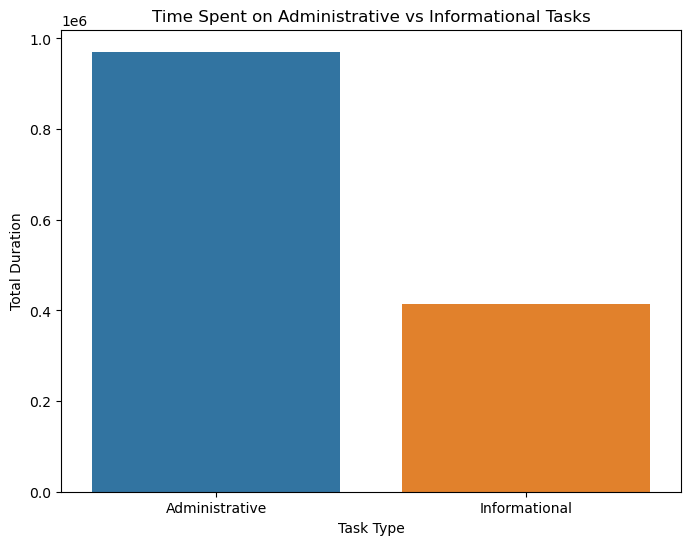

In [6]:
# 5. Are there any informational/administrative tasks which users spend time doing most?
task_durations = {
    'Administrative': df['administrative_duration'].sum(),
    'Informational': df['informational_duration'].sum(),
}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(task_durations.keys()), y=list(task_durations.values()))
plt.title("Time Spent on Administrative vs Informational Tasks")
plt.xlabel("Task Type")
plt.ylabel("Total Duration")
plt.show()

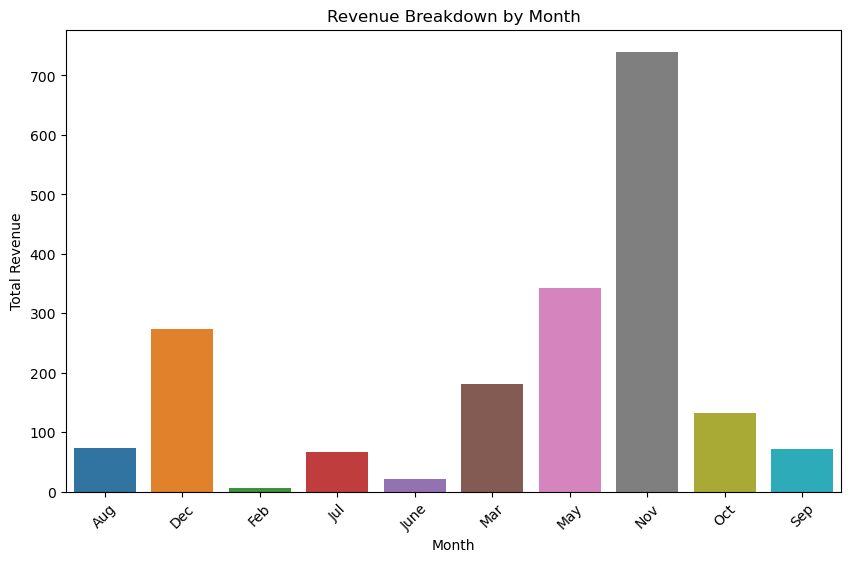

In [7]:
# 6. What is the breakdown of months making the most sales?
monthly_sales = df.groupby('month')['revenue'].sum().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Revenue Breakdown by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

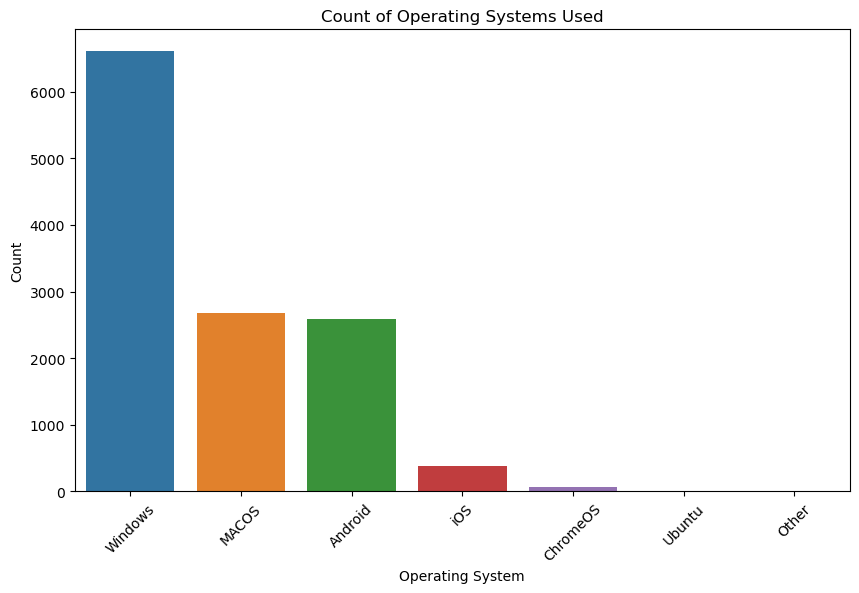

Operating System Usage Percentage:
Windows     53.584753
MACOS       21.703163
Android     20.957015
iOS          3.122466
ChromeOS     0.502839
Ubuntu       0.072993
Other        0.056772
Name: operating_systems, dtype: float64


In [8]:
# Milestone 4 task 1
# 1. Count of operating systems used
os_count = df["operating_systems"].value_counts()
os_percentage = (os_count / len(df)) * 100

# Plot count and percentage of operating systems
plt.figure(figsize=(10, 6))
sns.barplot(x=os_count.index, y=os_count.values)
plt.title('Count of Operating Systems Used')
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.xticks(rotation=45)
plt.show()

# Display percentage of each operating system
print("Operating System Usage Percentage:")
print(os_percentage)

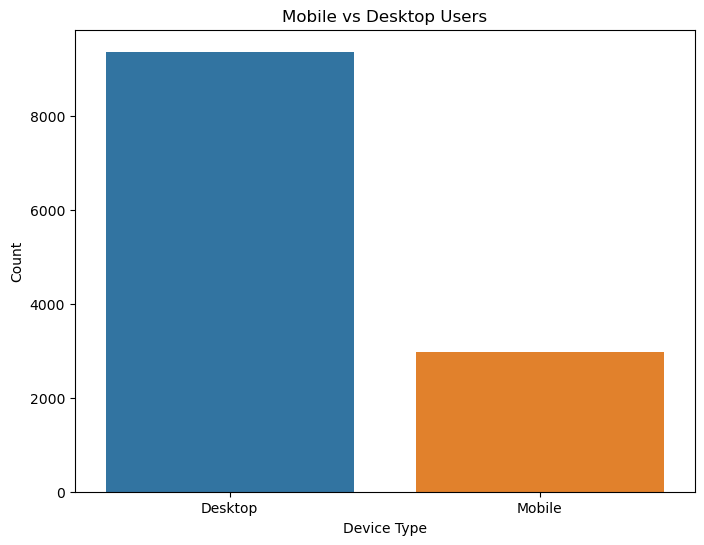

In [9]:
# 2. Users visiting the site from mobile vs desktop systems
mobile_os = ["Android", "iOS"]
df['device_type'] = df['operating_systems'].apply(lambda x: 'Mobile' if x in mobile_os else 'Desktop')

device_count = df['device_type'].value_counts()
device_percentage = (device_count / len(df)) * 100

# Plot device type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=device_count.index, y=device_count.values)
plt.title('Mobile vs Desktop Users')
plt.ylabel('Count')
plt.xlabel('Device Type')
plt.show()

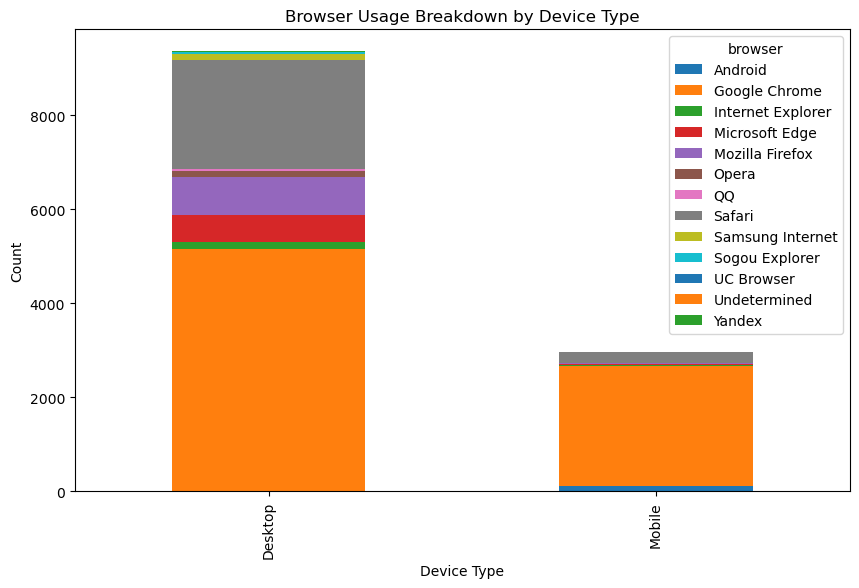

In [10]:
# 3. Browser usage breakdown on mobile vs desktop
browser_device_breakdown = df.groupby(['device_type', 'browser']).size().unstack().fillna(0)

# Plot browser usage by device
browser_device_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Browser Usage Breakdown by Device Type')
plt.ylabel('Count')
plt.xlabel('Device Type')
plt.show()

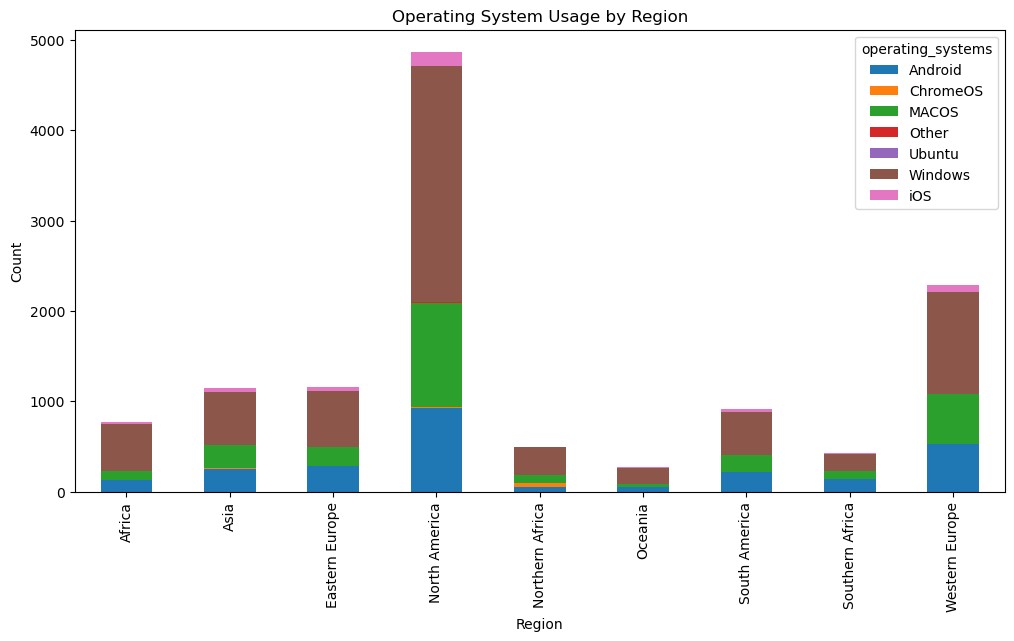

Operating Systems by Region Breakdown:
operating_systems  Android  ChromeOS   MACOS  Other  Ubuntu  Windows    iOS
region                                                                     
Africa               131.0       1.0    99.0    0.0     1.0    515.0   23.0
Asia                 255.0       3.0   261.0    1.0     0.0    589.0   34.0
Eastern Europe       280.0       3.0   209.0    2.0     0.0    623.0   37.0
North America        925.0       9.0  1159.0    3.0     7.0   2604.0  162.0
Northern Africa       53.0      40.0    91.0    1.0     0.0    306.0    8.0
Oceania               51.0       3.0    31.0    0.0     0.0    182.0    9.0
South America        221.0       0.0   182.0    0.0     0.0    476.0   34.0
Southern Africa      140.0       0.0    94.0    0.0     0.0    183.0    6.0
Western Europe       528.0       3.0   550.0    0.0     1.0   1129.0   72.0


In [11]:
# 4. Region-based operating system analysis
os_region_breakdown = df.groupby(['region', 'operating_systems']).size().unstack().fillna(0)

# Plot region vs operating system usage
os_region_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Operating System Usage by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

# Interpretation based on operating systems by region
print("Operating Systems by Region Breakdown:")
print(os_region_breakdown)


<Figure size 1200x600 with 0 Axes>

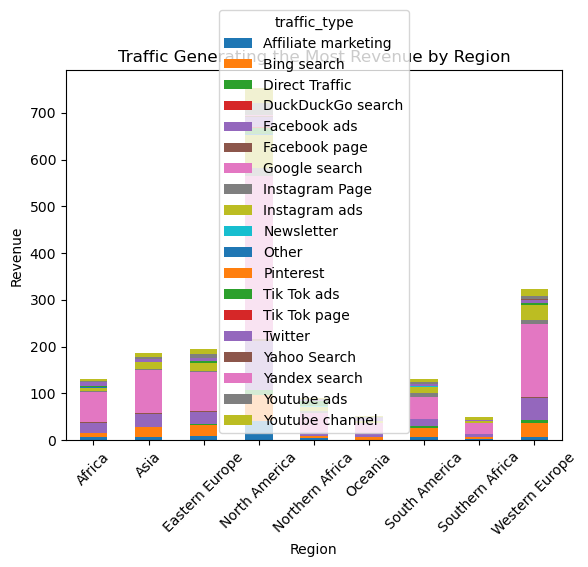

In [12]:
# Milestone 4 task 2
# 1. Traffic Generating the Most Revenue (Broken Down by Region)
revenue_by_region = df.groupby(['region', 'traffic_type'])['revenue'].sum().unstack().fillna(0)

# Plot revenue by region
plt.figure(figsize=(12, 6))
revenue_by_region.plot(kind='bar', stacked=True)
plt.title('Traffic Generating the Most Revenue by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

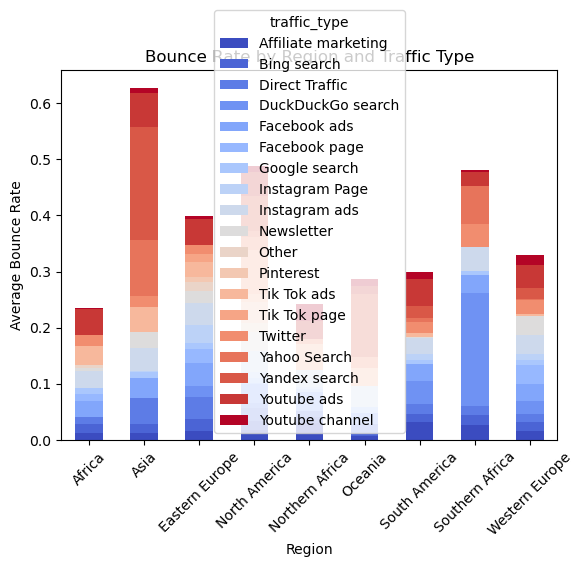

In [13]:
# 2. Traffic with the Highest Bounce Rate (Broken Down by Region)
bounce_rate_by_region = df.groupby(['region', 'traffic_type'])['bounce_rates'].mean().unstack().fillna(0)

# Plot bounce rate by region
plt.figure(figsize=(12, 6))
bounce_rate_by_region.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Bounce Rate by Region and Traffic Type')
plt.ylabel('Average Bounce Rate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

month
Aug      11
Dec      71
Feb       2
Jul      25
June      7
Mar      61
May      86
Nov     211
Oct      38
Sep      17
Name: revenue, dtype: int64


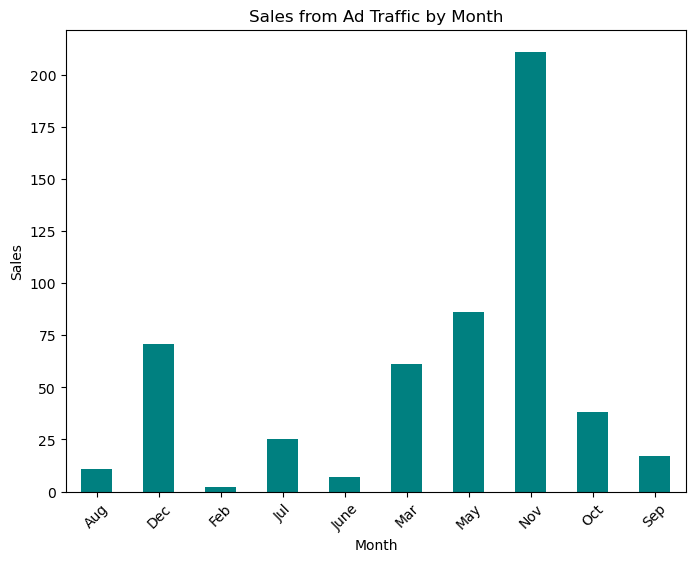

In [14]:
# 3. Months with the Most Sales from Ad Traffic
# Filter ad traffic by checking for 'ads' in the traffic_type column
ad_traffic = df[df['traffic_type'].str.contains('ads', case=False, na=False)]

# Group by month and sum revenue
ad_traffic_sales = ad_traffic.groupby('month')['revenue'].sum()

# Print the filtered data to debug
print(ad_traffic_sales)

# Plot sales from ad traffic by month if the data is not empty
if not ad_traffic_sales.empty:
    plt.figure(figsize=(8, 6))
    ad_traffic_sales.plot(kind='bar', color='teal')
    plt.title('Sales from Ad Traffic by Month')
    plt.ylabel('Sales')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No sales data available for ad traffic.")

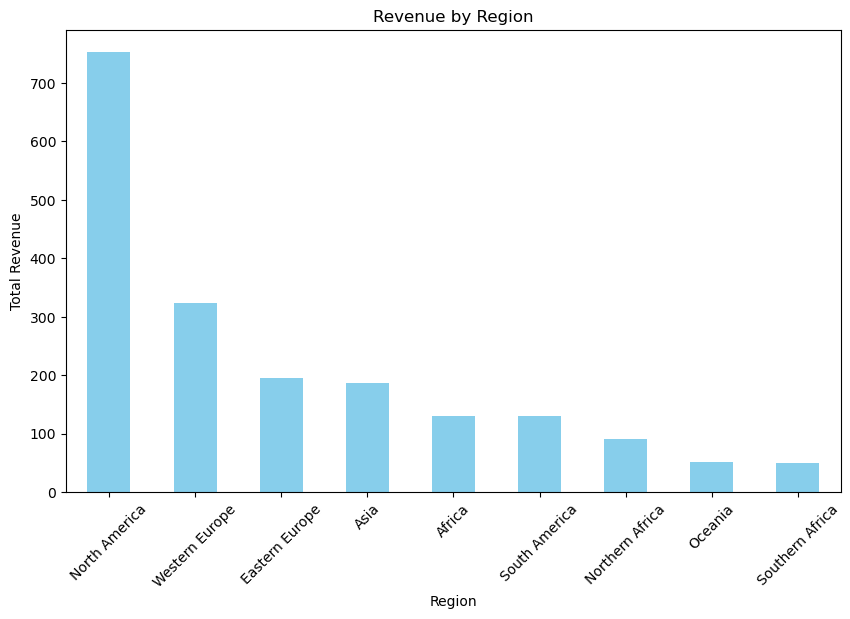

The region generating the most revenue: North America ($753.00)
The region generating the least revenue: Southern Africa ($49.00)


In [15]:
# Group by region and calculate total revenue
region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

# Plot region revenue
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# Print most and least revenue-generating regions
most_revenue = region_revenue.idxmax()
least_revenue = region_revenue.idxmin()
print(f"The region generating the most revenue: {most_revenue} (${region_revenue.max():,.2f})")
print(f"The region generating the least revenue: {least_revenue} (${region_revenue.min():,.2f})")


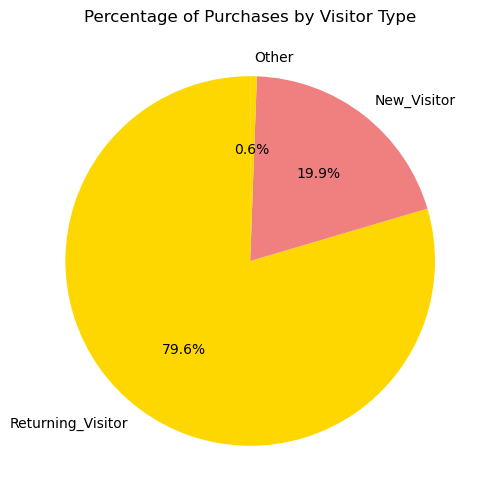

Percentage of Returning/New Visitors Making a Purchase:
Returning_Visitor    79.570456
New_Visitor          19.853326
Other                 0.576218
Name: visitor_type, dtype: float64


In [16]:
# Filter for purchases
purchases = df[df['revenue'] > 0]

# Calculate percentages
customer_type_percentages = purchases['visitor_type'].value_counts(normalize=True) * 100

# Plot percentages
plt.figure(figsize=(8, 6))
customer_type_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral'], startangle=90)
plt.title('Percentage of Purchases by Visitor Type')
plt.ylabel('')  # Remove y-label for cleaner pie chart
plt.show()

# Print percentages
print("Percentage of Returning/New Visitors Making a Purchase:")
print(customer_type_percentages)


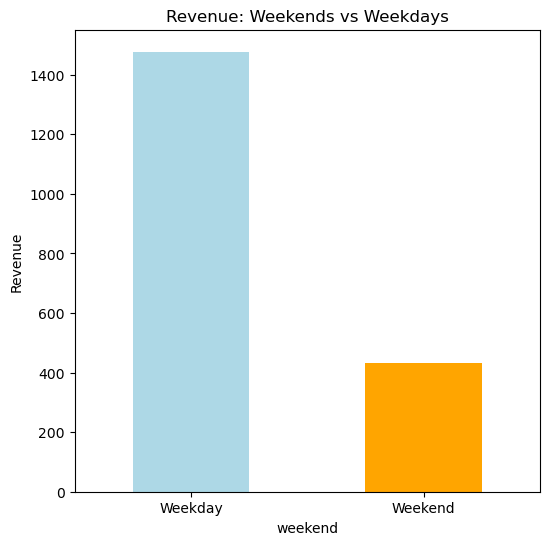

Revenue Comparison Between Weekends and Weekdays:
weekend
0    1477
1     432
Name: revenue, dtype: int64


In [17]:
# Group by weekend and calculate revenue
weekend_sales = df.groupby('weekend')['revenue'].sum()

# Plot sales comparison
plt.figure(figsize=(6, 6))
weekend_sales.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Revenue: Weekends vs Weekdays')
plt.ylabel('Revenue')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.show()

# Print comparison
print("Revenue Comparison Between Weekends and Weekdays:")
print(weekend_sales)


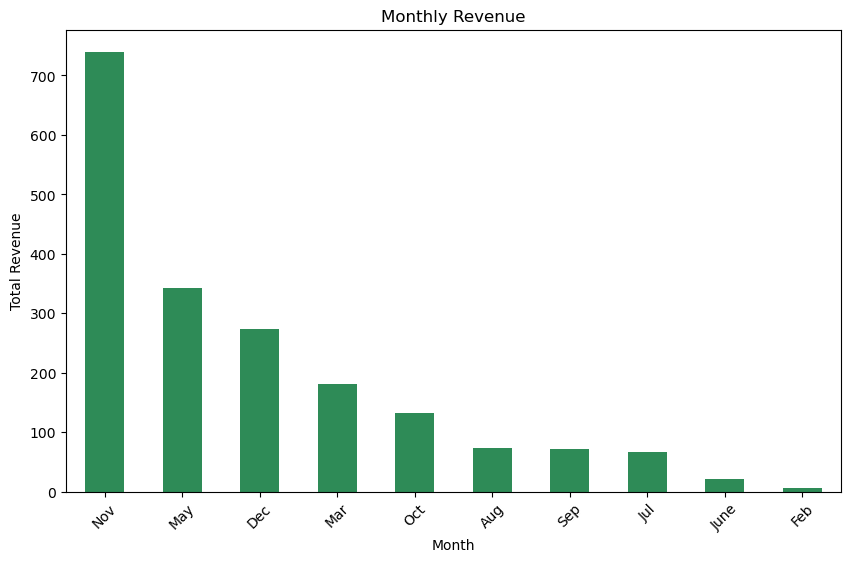

Monthly Revenue Summary:
month
Nov     740
May     342
Dec     274
Mar     181
Oct     133
Aug      74
Sep      71
Jul      67
June     21
Feb       6
Name: revenue, dtype: int64


In [18]:
# Group by month and calculate revenue
monthly_sales = df.groupby('month')['revenue'].sum().sort_values(ascending=False)

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='seagreen')
plt.title('Monthly Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# Print top months
print("Monthly Revenue Summary:")
print(monthly_sales)


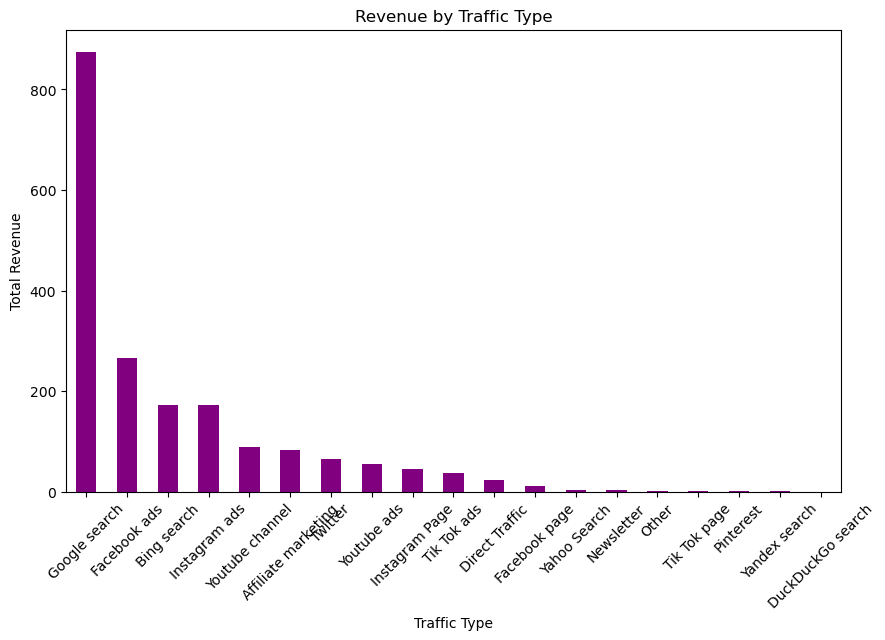

Revenue Breakdown by Traffic Type:
traffic_type
Google search          875
Facebook ads           266
Bing search            173
Instagram ads          172
Youtube channel         89
Affiliate marketing     83
Twitter                 65
Youtube ads             54
Instagram Page          46
Tik Tok ads             37
Direct Traffic          24
Facebook page           12
Yahoo Search             4
Newsletter               3
Other                    2
Tik Tok page             2
Pinterest                1
Yandex search            1
DuckDuckGo search        0
Name: revenue, dtype: int64


In [19]:
# Group by traffic_type and calculate revenue
traffic_revenue = df.groupby('traffic_type')['revenue'].sum().sort_values(ascending=False)

# Plot traffic revenue
plt.figure(figsize=(10, 6))
traffic_revenue.plot(kind='bar', color='purple')
plt.title('Revenue by Traffic Type')
plt.ylabel('Total Revenue')
plt.xlabel('Traffic Type')
plt.xticks(rotation=45)
plt.show()

# Print breakdown of traffic contributions
print("Revenue Breakdown by Traffic Type:")
print(traffic_revenue)
